In [25]:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(102)

print(tf.__version__)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [26]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [28]:
train_images.max()

255

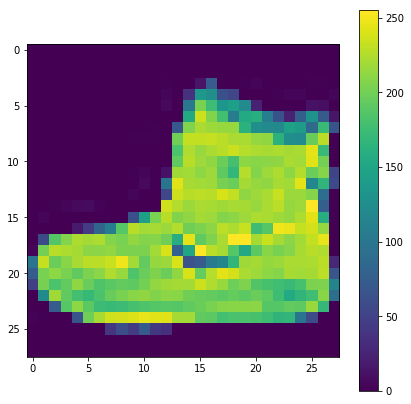

In [23]:
plt.imshow(train_images[0])
plt.colorbar()

In [30]:
train_images = train_images / 255.0
test_images = test_images / 255.0

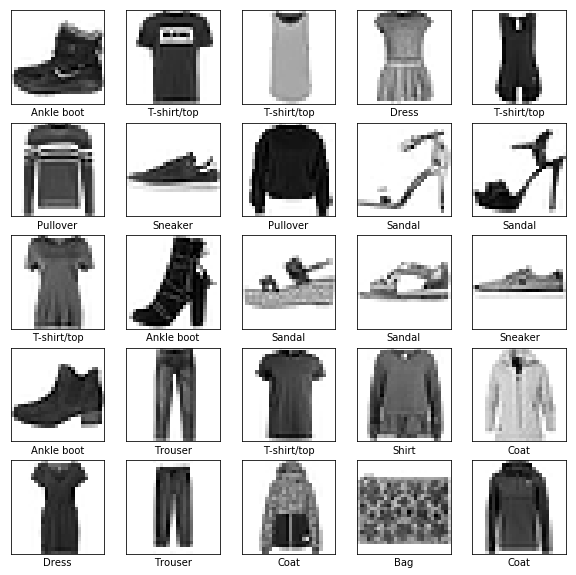

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [40]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [41]:
train_images = train_images.reshape(-1, 784).astype("float32")
test_images = test_images.reshape(-1, 784).astype("float32")

In [42]:
X_train = train_images / 255.
X_test = test_images  /255.

In [43]:
X_train.shape

(60000, 784)

In [44]:
y_train = tf.keras.utils.to_categorical(train_labels)
y_test  = tf.keras.utils.to_categorical(test_labels)

In [45]:
y_train.shape

(60000, 10)

In [46]:
model = tf.keras.Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [47]:

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=40, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
 - 3s - loss: 0.9114 - acc: 0.6550
Epoch 2/40
 - 3s - loss: 0.5569 - acc: 0.7951
Epoch 3/40
 - 3s - loss: 0.4807 - acc: 0.8246
Epoch 4/40
 - 3s - loss: 0.4397 - acc: 0.8407
Epoch 5/40
 - 3s - loss: 0.4107 - acc: 0.8504
Epoch 6/40
 - 3s - loss: 0.3911 - acc: 0.8574
Epoch 7/40
 - 3s - loss: 0.3792 - acc: 0.8613
Epoch 8/40
 - 3s - loss: 0.3639 - acc: 0.8676
Epoch 9/40
 - 3s - loss: 0.3544 - acc: 0.8713
Epoch 10/40
 - 3s - loss: 0.3434 - acc: 0.8745
Epoch 11/40
 - 3s - loss: 0.3340 - acc: 0.8783
Epoch 12/40
 - 3s - loss: 0.3273 - acc: 0.8790
Epoch 13/40
 - 3s - loss: 0.3208 - acc: 0.8820
Epoch 14/40
 - 3s - loss: 0.3132 - acc: 0.8848
Epoch 15/40
 - 3s - loss: 0.3103 - acc: 0.8854
Epoch 16/40
 - 3s - loss: 0.3036 - acc: 0.8882
Epoch 17/40
 - 3s - loss: 0.2990 - acc: 0.8889
Epoch 18/40
 - 3s - loss: 0.2932 - acc: 0.8907
Epoch 19/40
 - 3s - loss: 0.2896 - acc: 0.8920
Epoch 20/40
 - 3s - loss: 0.2852 - acc: 0.8941
Epoch 21/40
 - 3s - l

In [49]:
y_predict = model.predict_classes(X_test)
y_true_classes = np.argmax(y_test, axis=1)

In [50]:
correct_indices = np.nonzero(y_predict == y_true_classes)[0]
incorrect_indices = np.nonzero(y_predict != y_true_classes)[0]
print(correct_indices.shape)
print(incorrect_indices.shape)

(8840,)
(1160,)


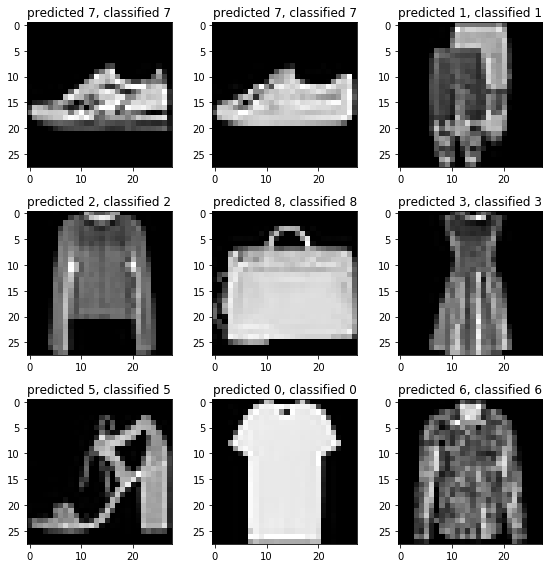

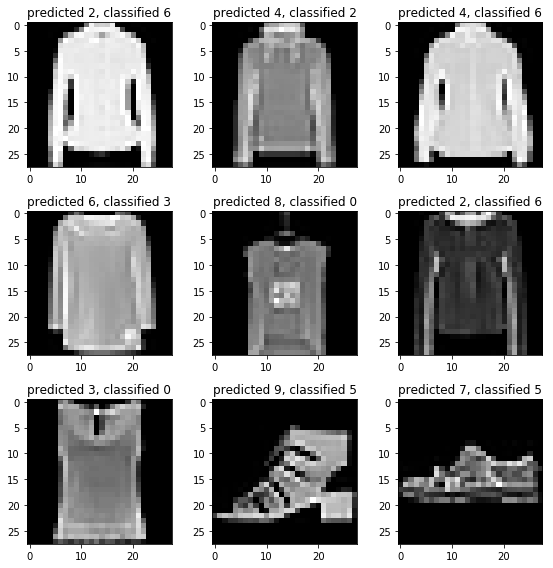

In [51]:
plt.figure(figsize=(8, 8))
for i, correct in enumerate(np.random.choice(correct_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[correct], y_true_classes[correct]))
    plt.tight_layout()
    
plt.figure(figsize=(8, 8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray')
    plt.title("predicted {}, classified {}".format(y_predict[incorrect], y_true_classes[incorrect]))
    plt.tight_layout()